## Dieses Notebook enthält die Schritte der explorativen Datenanalyse und eine erste Untersuchung des Datensatzes

## Codeabschnitt

#### Das Verzeichnis festlegen

In [1]:
import sys
from pathlib import Path

# Zum übergeordneten Ordner 'src' wechseln
current_path = Path().resolve()
src_path = current_path.parents[3]  # Zwei Stufen nach oben

if str(src_path) not in sys.path:
    sys.path.append(str(src_path))
    
print(f"Achtung, der globale Pfad wurde auf {src_path} gesetzt")

Achtung, der globale Pfad wurde auf C:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24 gesetzt


#### Imports & Downloads

In [2]:


import pandas as pd
import matplotlib.pyplot as plt
import re
import emoji
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
import os
from src.functions.shortcut_lists import shortcuts, shortforms
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from textblob import Word, TextBlob
pd.set_option('display.max_colwidth', None)
from src.functions.clean_data_generic_functions import clean_misspelled_words, correct_misspelled_words_in_sentence,create_word_counter,expand_slang,expand_shortcuts,extract_emojis, to_lowercase, to_lowercase_if_string, handle_hashtags, handle_userhandles, lemmatize, remove_word_from_column, remove_na_from_column, replace_smileys, replace_text_smileys, segment_text_cases, segment_text_english, segment_text_twitter, segment_tweets
from src.functions.clean_data_generic_functions import remove_special_characters, remove_digits, remove_duplicates, remove_emoji_in_sentence, remove_emojis, remove_freqwords,remove_hashtag_sign_from_tweet,remove_least_frequent_words, remove_most_frequent_words, remove_punctuation, remove_stop_words, remove_url_from_tweet, replace_emoji_in_sentence, replace_emojis


from PIL import Image
import os


Reading english - 1grams ...
Reading english - 2grams ...


C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Reading english - 1grams ...
Reading english - 2grams ...
Reading twitter - 1grams ...
Reading twitter - 2grams ...


In [3]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Nasiba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nasiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Beladung der Daten

In [4]:

source_filepath_name = os.path.abspath(os.path.join(src_path, 'data/new_datasets/train.csv'))
df_origin = pd.read_csv(source_filepath_name, encoding='utf-8', index_col=0)
filepath_name = os.path.abspath(os.path.join(src_path, 'data/new_datasets/train_cleaned.csv'))
df_cleaned_origin = pd.read_csv(filepath_name, encoding='utf-8')

source_filepath_name_test = os.path.abspath(os.path.join(src_path, 'data/new_datasets/test.csv'))
df_origin_test = pd.read_csv(source_filepath_name_test, encoding='utf-8', index_col=0)
filepath_name_test = os.path.abspath(os.path.join(src_path, 'data/new_datasets/test_cleaned.csv'))
df_cleaned_test = pd.read_csv(filepath_name_test, encoding='utf-8', index_col=0)

#### Datenumfang

In [5]:
df_cleaned = df_cleaned_origin.copy()

In [6]:
print("Anzahl Datensätze der unbereinigten Traindaten")
print(df_origin.tweet.count())
print("Anzahl Datensätze der bereinigten Traindaten")
print(df_cleaned.tweet.count())
print("Anzahl der entfernten Datensätze während Cleaning")
print(df_cleaned.tweet.count() - df_origin.tweet.count())
print("Anteil der entfernten Datensätze während Cleaning")
print((df_cleaned.tweet.count() / df_origin.tweet.count() - 1) * 100)

Anzahl Datensätze der unbereinigten Traindaten
123472
Anzahl Datensätze der bereinigten Traindaten
61258
Anzahl der entfernten Datensätze während Cleaning
-62214
Anteil der entfernten Datensätze während Cleaning
-50.387132305299986


In [7]:
print(df_origin[df_origin.label == 1].count())
print(df_cleaned[df_cleaned.label == 1].count())
print(df_cleaned[df_cleaned.label == 1].count() - df_origin[df_origin.label == 1].count())
print((df_cleaned[df_cleaned.label == 1].count() / df_origin[df_origin.label == 1].count() - 1) * 100)

tweet    36862
label    36862
dtype: int64
Unnamed: 0       13103
tweet            13103
label            13103
tweet_cleaned    13103
user_handle      13103
hashtags         13103
emojis             808
dtype: int64
Unnamed: 0           NaN
emojis               NaN
hashtags             NaN
label           -23759.0
tweet           -23759.0
tweet_cleaned        NaN
user_handle          NaN
dtype: float64
Unnamed: 0             NaN
emojis                 NaN
hashtags               NaN
label           -64.453909
tweet           -64.453909
tweet_cleaned          NaN
user_handle            NaN
dtype: float64


#### Label Verteilung bereinigte vs. unbereinigte Datensätze

In [8]:
# Klassenverteilung in den ursprünglichen Trainingsdaten
train_label_counts = df_origin['label'].value_counts()
print("Klassenverteilung in den ursprünglichen Trainingsdaten:")
print(train_label_counts)

# Klassenverteilung in den bereinigten Trainingsdaten
train_cleaned_label_counts = df_cleaned['label'].value_counts()
print("\nKlassenverteilung in den bereinigten Trainingsdaten:")
print(train_cleaned_label_counts)


Klassenverteilung in den ursprünglichen Trainingsdaten:
label
0    86610
1    36862
Name: count, dtype: int64

Klassenverteilung in den bereinigten Trainingsdaten:
label
0    48155
1    13103
Name: count, dtype: int64


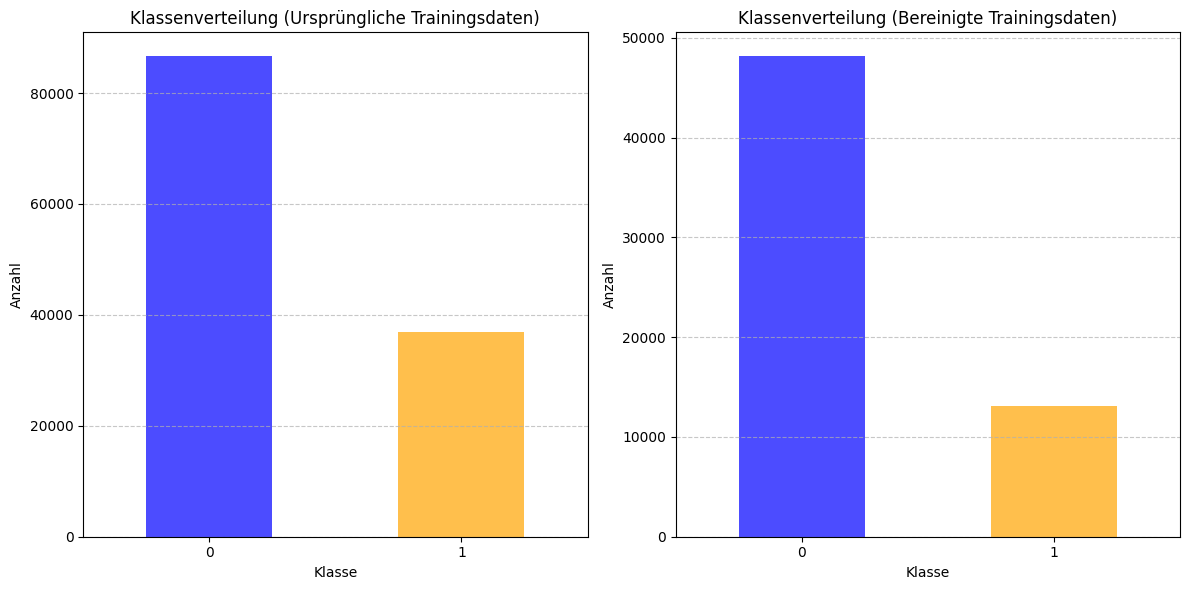

In [9]:
# Visualisierung der Klassenverteilung
plt.figure(figsize=(12, 6))

# Originale Daten
plt.subplot(1, 2, 1)
train_label_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Klassenverteilung (Ursprüngliche Trainingsdaten)')
plt.xlabel('Klasse')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Bereinigte Daten
plt.subplot(1, 2, 2)
train_cleaned_label_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Klassenverteilung (Bereinigte Trainingsdaten)')
plt.xlabel('Klasse')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### Statistiken der Train Daten vs. Test Daten

In [21]:
# Berechnung der Länge der Tweets
train_data_len = df_origin['tweet'].str.len()
test_data_len = df_origin_test['tweet'].str.len()

train_cleaned_data_len = df_cleaned['tweet_cleaned_2'].str.len()
test_cleaned_data_len = df_cleaned_test['tweet_cleaned_2'].str.len()

# Statistiken für Trainingsdaten
print("Statistiken zur Länge der Trainingsdaten:")
print(f"Durchschnittliche Länge: {train_data_len.mean():.2f}")
print(f"Median der Länge: {train_data_len.median():.2f}")
print(f"Minimale Länge: {train_data_len.min()}")
print(f"Maximale Länge: {train_data_len.max()}")
print(f"Standardabweichung: {train_data_len.std():.2f}\n")

# Statistiken für Testdaten
print("Statistiken zur Länge der Testdaten:")
print(f"Durchschnittliche Länge: {test_data_len.mean():.2f}")
print(f"Median der Länge: {test_data_len.median():.2f}")
print(f"Minimale Länge: {test_data_len.min()}")
print(f"Maximale Länge: {test_data_len.max()}")
print(f"Standardabweichung: {test_data_len.std():.2f} \n")

# Statistiken für bereinigte Trainingsdaten
print("Statistiken zur Länge der bereinigten Trainingsdaten:")
print(f"Durchschnittliche Länge: {train_cleaned_data_len.mean():.2f}")
print(f"Median der Länge: {train_cleaned_data_len.median():.2f}")
print(f"Minimale Länge: {train_cleaned_data_len.min()}")
print(f"Maximale Länge: {train_cleaned_data_len.max()}")
print(f"Standardabweichung: {train_cleaned_data_len.std():.2f}\n")

# Statistiken für bereinigte Testdaten
print("Statistiken zur Länge der bereinigten Testdaten:")
print(f"Durchschnittliche Länge: {test_cleaned_data_len.mean():.2f}")
print(f"Median der Länge: {test_cleaned_data_len.median():.2f}")
print(f"Minimale Länge: {test_cleaned_data_len.min()}")
print(f"Maximale Länge: {test_cleaned_data_len.max()}")
print(f"Standardabweichung: {test_cleaned_data_len.std():.2f}\n")


KeyError: 'tweet_cleaned_2'

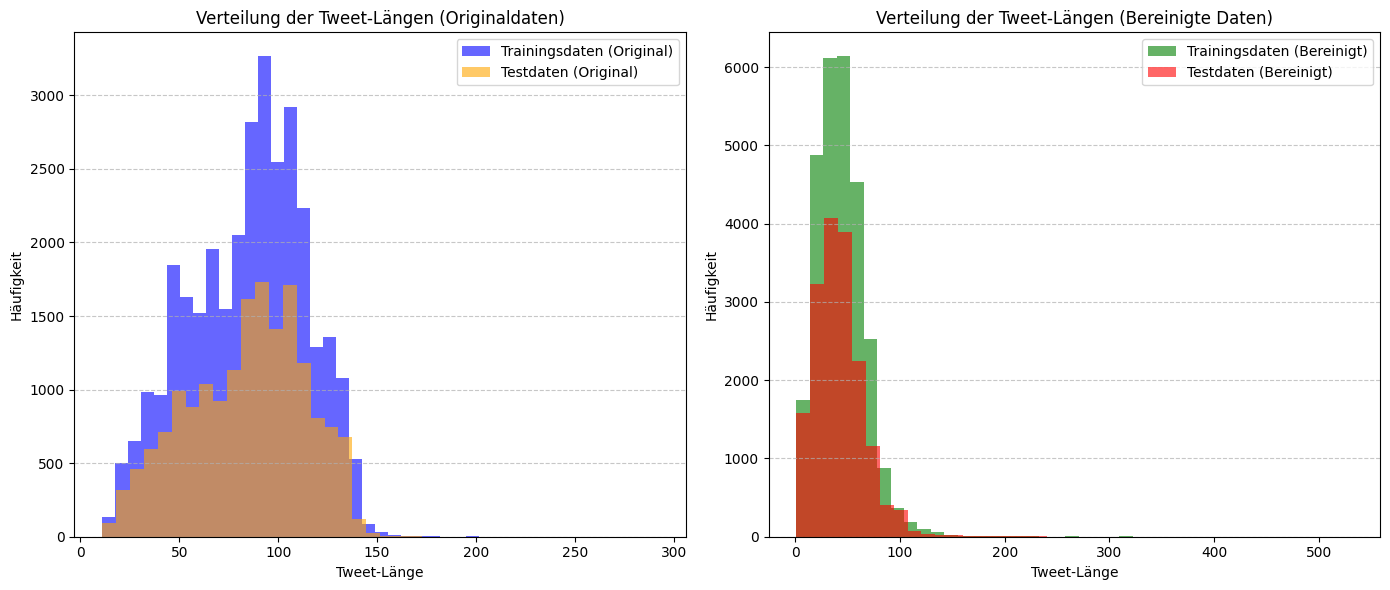

In [ ]:
# Erstellung der Subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Originaldaten
plt.subplot(1, 2, 1)
plt.hist(train_data_len, bins=40, alpha=0.6, label='Trainingsdaten (Original)', color='blue')
plt.hist(test_data_len, bins=40, alpha=0.6, label='Testdaten (Original)', color='orange')
plt.title('Verteilung der Tweet-Längen (Originaldaten)')
plt.xlabel('Tweet-Länge')
plt.ylabel('Häufigkeit')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Bereinigte Daten
plt.subplot(1, 2, 2)
plt.hist(train_cleaned_data_len, bins=40, alpha=0.6, label='Trainingsdaten (Bereinigt)', color='green')
plt.hist(test_cleaned_data_len, bins=40, alpha=0.6, label='Testdaten (Bereinigt)', color='red')
plt.title('Verteilung der Tweet-Längen (Bereinigte Daten)')
plt.xlabel('Tweet-Länge')
plt.ylabel('Häufigkeit')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Layout-Anpassung und Anzeige
plt.tight_layout()
plt.show()


#### Analyse der Wörter in Tweets

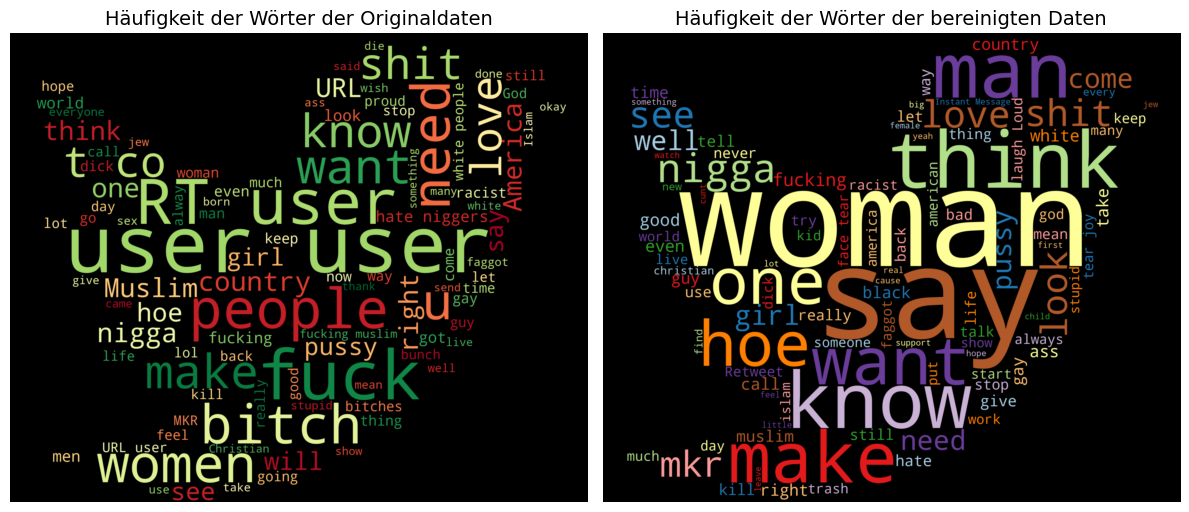

In [12]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_mask = np.array(Image.open("twitter.png"))

df_origin['tweet'] = df_origin['tweet'].apply(lambda x: x if isinstance(x, str) else '')
#origin_text = " ".join(tweet for tweet in df_origin['tweet'])

# Verarbeitung der Daten aus df_cleaned
df_cleaned['tweet_cleaned'] = df_cleaned['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')
#cleaned_text = " ".join(tweet for tweet in df_cleaned['tweet_cleaned_2'])

dataset_1_text = " ".join(df_origin["tweet"].tolist())  
dataset_2_text = " ".join(df_cleaned["tweet_cleaned"].tolist())  

plt.figure(figsize=(12, 6)) 

# Subplot 1: Dataset 1
plt.subplot(1, 2, 1)
wordcloud = WordCloud(stopwords=None, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='RdYlGn').generate(dataset_1_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Häufigkeit der Wörter der Originaldaten", fontsize=14)  

# Subplot 2: Dataset 2
plt.subplot(1, 2, 2)
wordcloud = WordCloud(stopwords=None, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='Paired').generate(dataset_2_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Häufigkeit der Wörter der bereinigten Daten", fontsize=14)  


plt.tight_layout()
plt.show()


#### Analyse der Wörter in Hate Speech Tweets

C:\Users\Nasiba\AppData\Local\Temp\ipykernel_25604\563957184.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_origin_label_1['tweet'] = df_origin_label_1['tweet'].apply(lambda x: x if isinstance(x, str) else '')
C:\Users\Nasiba\AppData\Local\Temp\ipykernel_25604\563957184.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_label_1['tweet_cleaned'] = df_cleaned_label_1['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')


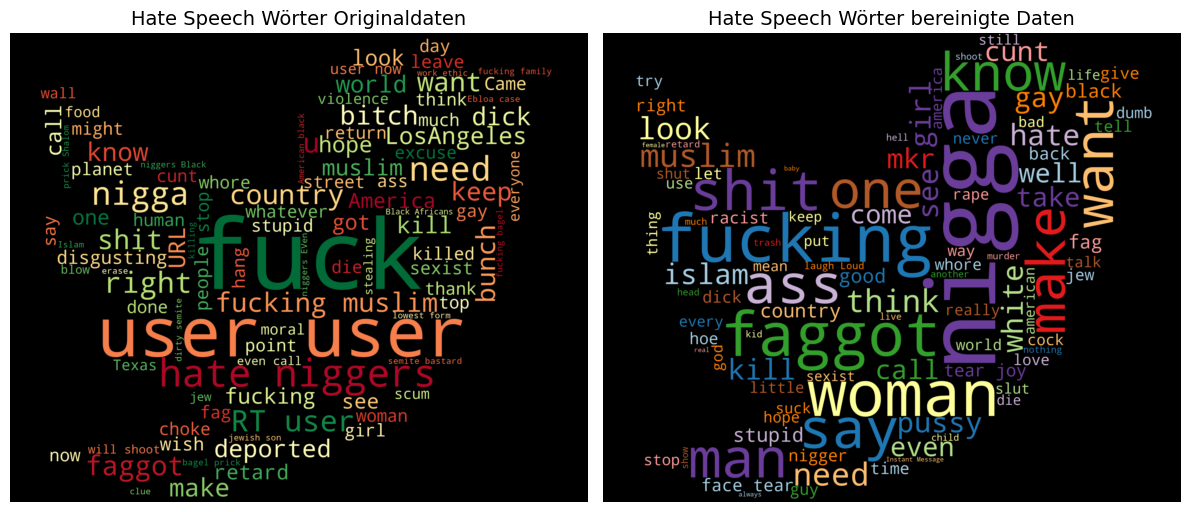

In [13]:
wordcloud_mask = np.array(Image.open("twitter.png"))

df_origin_label_1= df_origin[df_origin['label']==1]
df_cleaned_label_1= df_cleaned[df_cleaned['label']==1]


df_origin_label_1['tweet'] = df_origin_label_1['tweet'].apply(lambda x: x if isinstance(x, str) else '')

df_cleaned_label_1['tweet_cleaned'] = df_cleaned_label_1['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')

dataset_1_text = " ".join(df_origin_label_1["tweet"].tolist())  
dataset_2_text = " ".join(df_cleaned_label_1["tweet_cleaned"].tolist())  

plt.figure(figsize=(12, 6)) 

# Subplot 1: Dataset 1
plt.subplot(1, 2, 1)
wordcloud = WordCloud(stopwords=None, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='RdYlGn').generate(dataset_1_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Hate Speech Wörter Originaldaten", fontsize=14)  

# Subplot 2: Dataset 2
plt.subplot(1, 2, 2)
wordcloud = WordCloud(stopwords=None, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='Paired').generate(dataset_2_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Hate Speech Wörter bereinigte Daten", fontsize=14)  


plt.tight_layout()
plt.show()


#### Vergleich No Hate Speech/ Hate Speech

In [1]:
wordcloud_mask = np.array(Image.open("twitter.png"))

df_cleaned_label_0= df_cleaned[df_cleaned['label']==0]
df_cleaned_label_1= df_cleaned[df_cleaned['label']==1]


df_cleaned_label_0['tweet_cleaned'] = df_cleaned_label_0['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')

df_cleaned_label_1['tweet_cleaned'] = df_cleaned_label_1['tweet_cleaned'].apply(lambda x: x if isinstance(x, str) else '')

dataset_1_text = " ".join(df_cleaned_label_0['tweet_cleaned'].tolist())  
dataset_2_text = " ".join(df_cleaned_label_1["tweet_cleaned"].tolist())  

plt.figure(figsize=(12, 6)) 

# Subplot 1: Dataset 1
plt.subplot(1, 2, 1)
wordcloud = WordCloud(stopwords=None, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='RdYlGn').generate(dataset_1_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("No Hate Speech Wörter bereinigte Daten", fontsize=14)  

# Subplot 2: Dataset 2
plt.subplot(1, 2, 2)
wordcloud = WordCloud(stopwords=None, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='Paired').generate(dataset_2_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Hate Speech Wörter bereinigte Daten", fontsize=14)  


plt.tight_layout()
plt.show()


NameError: name 'np' is not defined

#### Hashtag Analyse

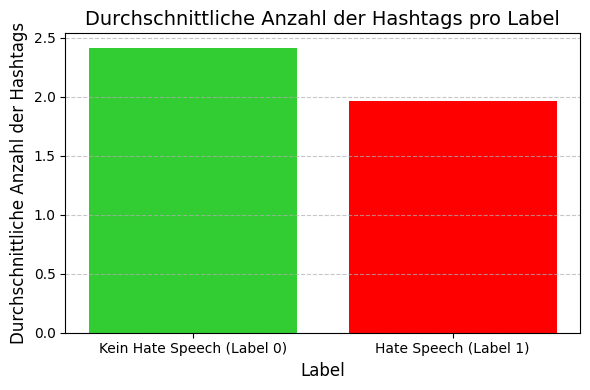

Durchschnittliche Anzahl der Hashtags in 'Kein Hate Speech' Tweets: 2.42
Durchschnittliche Anzahl der Hashtags in 'Hate Speech' Tweets: 1.96


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Gruppieren der Daten basierend auf dem Label und Berechnung der durchschnittlichen Anzahl der Hashtags

df_cleaned_new = df_cleaned.copy()
df_cleaned_new['num_hashtags'] = df_cleaned_new['hashtags'].apply(lambda x: len(eval(x)) if isinstance(x, str) and x.startswith('[') else 0)

avg_hashtags = df_cleaned_new.groupby('label')['num_hashtags'].mean()

# Erstellen eines Barplots
plt.figure(figsize=(6, 4))
plt.bar(['Kein Hate Speech (Label 0)', 'Hate Speech (Label 1)'], avg_hashtags, color=['limegreen', 'red'])
plt.title('Durchschnittliche Anzahl der Hashtags pro Label', fontsize=14)
plt.ylabel('Durchschnittliche Anzahl der Hashtags', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Anzeige des Ergebnisses
plt.tight_layout()
plt.show()

# Ausgabe der genauen Werte zur Unterstützung der Analyse
print(f"Durchschnittliche Anzahl der Hashtags in 'Kein Hate Speech' Tweets: {avg_hashtags[0]:.2f}")
print(f"Durchschnittliche Anzahl der Hashtags in 'Hate Speech' Tweets: {avg_hashtags[1]:.2f}")


C:\Users\Nasiba\AppData\Local\Temp\ipykernel_23052\3782159774.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_label_0['hashtags'] = df_cleaned_label_0['hashtags'].apply(lambda x: x if isinstance(x, str) else '')
C:\Users\Nasiba\AppData\Local\Temp\ipykernel_23052\3782159774.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_label_1['hashtags'] = df_cleaned_label_1['hashtags'].apply(lambda x: x if isinstance(x, str) else '')


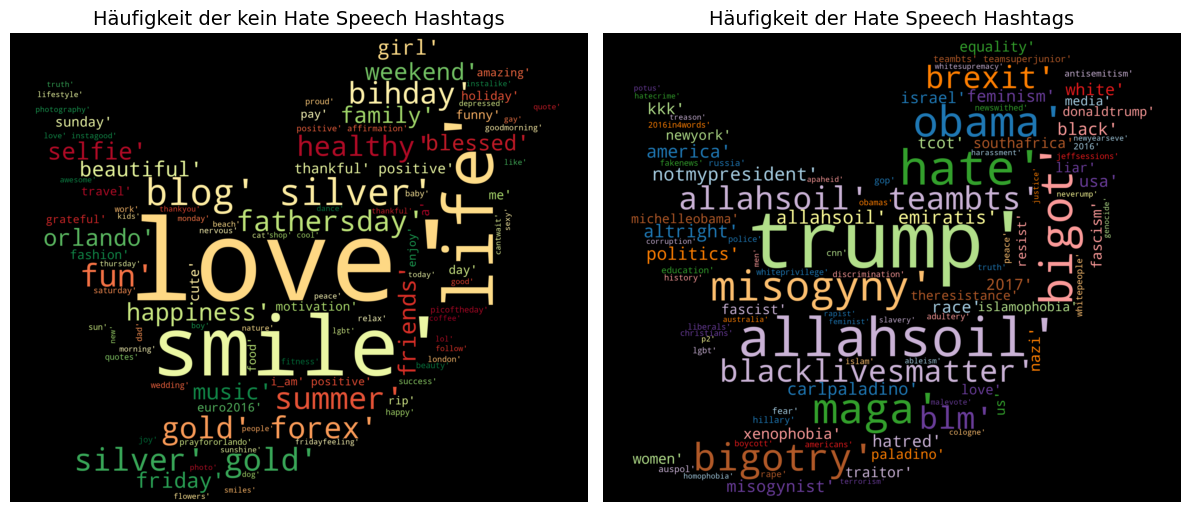

In [ ]:
wordcloud_mask = np.array(Image.open("twitter.png"))

df_cleaned_label_0= df_cleaned[df_cleaned['label']==0]
df_cleaned_label_1= df_cleaned[df_cleaned['label']==1]


df_cleaned_label_0['hashtags'] = df_cleaned_label_0['hashtags'].apply(lambda x: x if isinstance(x, str) else '')

df_cleaned_label_1['hashtags'] = df_cleaned_label_1['hashtags'].apply(lambda x: x if isinstance(x, str) else '')

dataset_1_text = " ".join(df_cleaned_label_0["hashtags"].tolist())  
dataset_2_text = " ".join(df_cleaned_label_1["hashtags"].tolist())  

plt.figure(figsize=(12, 6)) 

# Subplot 1: Dataset 1
plt.subplot(1, 2, 1)
wordcloud = WordCloud(stopwords=None, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='RdYlGn').generate(dataset_1_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Häufigkeit der kein Hate Speech Hashtags", fontsize=14)  

# Subplot 2: Dataset 2
plt.subplot(1, 2, 2)
wordcloud = WordCloud(stopwords=None, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='Paired').generate(dataset_2_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Häufigkeit der Hate Speech Hashtags", fontsize=14)  


plt.tight_layout()
plt.show()


### Anzahl von Mentions und Hashtags pro Tweet

In [ ]:

df_cleaned_new['num_mentions'] = df_cleaned_new['tweet'].apply(lambda x: x.count('@'))
df_cleaned_new['num_hashtags'] = df_cleaned_new['tweet'].apply(lambda x: x.count('#'))

df_cleaned_new['num_mentions'] = df_cleaned_new['tweet'].apply(lambda x: x.count('@'))
df_cleaned_new['num_hashtags'] = df_cleaned_new['tweet'].apply(lambda x: x.count('#'))

mentions_stats = {
    "Mean Mentions": df_cleaned_new['num_mentions'].mean(),
    "Median Mentions": df_cleaned_new['num_mentions'].median(),
    "Max Mentions": df_cleaned_new['num_mentions'].max(),
    "Min Mentions": df_cleaned_new['num_mentions'].min(),
    "Total Mentions": df_cleaned_new['num_mentions'].sum()
}

hashtags_stats = {
    "Mean Hashtags": df_cleaned_new['num_hashtags'].mean(),
    "Median Hashtags": df_cleaned_new['num_hashtags'].median(),
    "Max Hashtags": df_cleaned_new['num_hashtags'].max(),
    "Min Hashtags": df_cleaned_new['num_hashtags'].min(),
    "Total Hashtags": df_cleaned_new['num_hashtags'].sum()
}

print("Statistics for Mentions (@):")
for key, value in mentions_stats.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

print("\nStatistics for Hashtags (#):")
for key, value in hashtags_stats.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")


Statistics for Mentions (@):
Mean Mentions: 0.59
Median Mentions: 0.00
Max Mentions: 10
Min Mentions: 0
Total Mentions: 16248

Statistics for Hashtags (#):
Mean Hashtags: 2.40
Median Hashtags: 2.00
Max Hashtags: 20
Min Hashtags: 0
Total Hashtags: 66356


C:\Users\Nasiba\AppData\Local\Temp\ipykernel_23052\322232222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_label_1['num_mentions'] = df_cleaned_label_1['tweet'].apply(lambda x: x.count('@'))


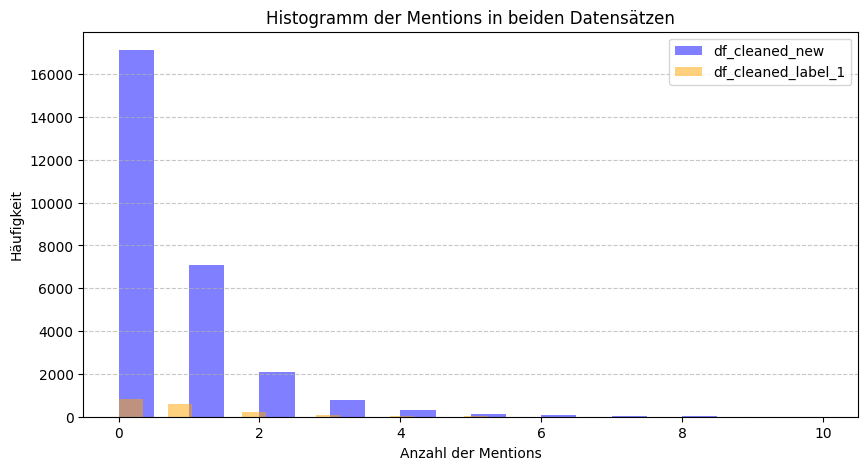

In [ ]:

df_cleaned_new['num_mentions'] = df_cleaned_new['tweet'].apply(lambda x: x.count('@'))
df_cleaned_label_1['num_mentions'] = df_cleaned_label_1['tweet'].apply(lambda x: x.count('@'))


plt.figure(figsize=(10, 5))

# Histogramm für df_cleaned_new
plt.hist(df_cleaned_new['num_mentions'], bins=20, alpha=0.5, label='df_cleaned_new', color='blue')

# Histogramm für df_cleaned_label_1
plt.hist(df_cleaned_label_1['num_mentions'], bins=20, alpha=0.5, label='df_cleaned_label_1', color='orange')

plt.xlabel("Anzahl der Mentions")
plt.ylabel("Häufigkeit")
plt.title("Histogramm der Mentions in beiden Datensätzen")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [ ]:

df_cleaned_emojis = df_cleaned[df_cleaned['emojis'].notna()]
df_cleaned_emojis_label_1 = df_cleaned_label_1[df_cleaned_label_1['emojis'].notna()]

anzahl_datensätze_gesamt = df_cleaned['id'].count()
anzahl_datensätze_mit_emojis = df_cleaned_emojis['id'].count()

anzahl_datensätze_label1 = df_cleaned_label_1['id'].count()
anzahl_datensätze_mit_emojis_label1 = df_cleaned_emojis_label_1['id'].count()

print("Datensätze gesamt/mit emoji")
print(anzahl_datensätze_gesamt)
print(anzahl_datensätze_mit_emojis)

print("Datensätze label1/mit emoji")
print(anzahl_datensätze_label1)
print(anzahl_datensätze_mit_emojis_label1)



Datensätze gesamt/mit emoji
27611
5906
Datensätze label1/mit emoji
1805
92


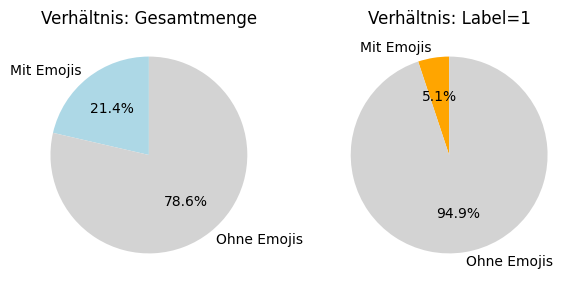

In [ ]:
# Daten für die Kreisdiagramme
# 1. Kreisdiagramm: Verhältnis für alle Datensätze
data_gesamt = [anzahl_datensätze_mit_emojis, anzahl_datensätze_gesamt - anzahl_datensätze_mit_emojis]
labels_gesamt = ['Mit Emojis', 'Ohne Emojis']

# 2. Kreisdiagramm: Verhältnis für Datensätze mit label=1
data_label1 = [anzahl_datensätze_mit_emojis_label1, anzahl_datensätze_label1 - anzahl_datensätze_mit_emojis_label1]
labels_label1 = ['Mit Emojis', 'Ohne Emojis']

# Erstellung der Subplots für zwei Kreisdiagramme
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Kreisdiagramm 1: Alle Datensätze
axes[0].pie(data_gesamt, labels=labels_gesamt, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgrey'])
axes[0].set_title('Verhältnis: Gesamtmenge')

# Kreisdiagramm 2: Datensätze mit label=1
axes[1].pie(data_label1, labels=labels_label1, autopct='%1.1f%%', startangle=90, colors=['orange', 'lightgrey'])
axes[1].set_title('Verhältnis: Label=1')

# Layout-Anpassung und Anzeige
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned[['tweet','tweet_cleaned']].head(50)

,tweet,tweet_cleaned
0,@user #cinemaaawards final rehearsals!! gearing up for the evening!! #butterflies #stage ! hope u all like it,final rehearsal gear evening butterfly stage hope like
1,istg this is the best cheese ta but dayum expensive,good cheese ta expensive
2,this was amazing. the weather was not. #musical #london #matilda #westend #weekend …,amazing weather musical london weekend
3,yes! #talented #sexy ‘criminal minds’ casts @user as series regular for season 12 via @user,yes talented sexy ' criminal mind ' cast series regular season via
4,want to be while being #successful? see how #worklifebalance helps in by @user @user,want successful see help
5,"really, @user !!!!! #thepurge is what you show on #fathersday for a movie trailer? kids are watching! get a clue!!!",really show fathersday movie trailer kid watch get clue
6,be happy. be bright. be you.💖👑 #monday #motivation #inspiration,happy bright sparkle crown monday motivation inspiration
7,where is the world heading? you could lose your life just for leaving your home. #orlando,world head could lose life leave home orlando
8,#horsepower bull up: you will dominate your bull and you will direct it whatever you want it to do. when y,bull dominate bull direct whatever want
9,#bihday! a new #porait of #princenicolas of #sweden who turns 1 today. #congrats! #kongebloggen #royals,bihday new porait sweden turn today congrats royal


#### Data Qualitiy Checks nach Data Cleaning

In [4]:
df_cleaned = df_cleaned_origin.copy()

In [5]:
df_cleaned['tweet_cleaned_2'] = df_cleaned['tweet']
df_cleaned = to_lowercase(df_cleaned,'tweet_cleaned_2')


In [6]:
df_cleaned = replace_text_smileys(df_cleaned,'tweet_cleaned_2')

In [7]:
df_cleaned = expand_shortcuts(df_cleaned,'tweet_cleaned_2')

In [8]:
df_cleaned = handle_userhandles(df_cleaned,'tweet_cleaned_2')

In [9]:
df_cleaned = handle_hashtags(df_cleaned,'tweet_cleaned_2')

In [10]:
df_cleaned = extract_emojis(df_cleaned,'tweet_cleaned_2')

In [11]:
df_cleaned = replace_emojis(df_cleaned,'tweet_cleaned_2')

In [12]:
df_cleaned = remove_url_from_tweet(df_cleaned,'tweet_cleaned_2')

In [13]:
df_cleaned = remove_punctuation(df_cleaned,'tweet_cleaned_2')

In [14]:
df_cleaned = remove_special_characters(df_cleaned, 'tweet_cleaned_2')

In [15]:
df_cleaned = remove_digits(df_cleaned,'tweet_cleaned_2')

In [16]:
df_cleaned = remove_word_from_column(df=df_cleaned, column_name="tweet_cleaned",word="amp")

In [17]:
df_cleaned = lemmatize(df_cleaned,'tweet_cleaned_2')

In [18]:
df_cleaned = remove_stop_words(df_cleaned,'tweet_cleaned_2')

In [19]:
df_cleaned = remove_duplicates(df_cleaned,'tweet_cleaned_2')

In [20]:
df_cleaned=remove_na_from_column(df=df_cleaned, column_name="tweet_cleaned")

In [108]:
df_cleaned = remove_least_frequent_words(df_cleaned,'tweet_cleaned_2')

In [ ]:
df_cleaned = remove_most_frequent_words(df_cleaned,'tweet_cleaned_2')

In [21]:
from ekphrasis.classes.segmenter import Segmenter

# Initialisiere Segmenter nur einmal
seg_cases = Segmenter()  # Für CamelCase
seg_english = Segmenter(corpus="english")  # Für englischen Text
seg_twitter = Segmenter(corpus="twitter")  # Für Twitter-Daten
def segment_text_cases(text, segmenter):
    """
    Separates CamelCase and pascalCase words into strings.
    """
    new_text = []
    for w in text.split():
        new_word = segmenter.segment(w)
        new_text.append(new_word)
    return ' '.join(new_text)

def segment_text_english(text, segmenter):
    """
    Separates English words into strings using a provided corpus.
    """
    new_text = []
    for w in text.split():
        new_word = segmenter.segment(w)
        new_text.append(new_word)
    return ' '.join(new_text)

def segment_text_twitter(text, segmenter):
    """
    Separates Twitter-specific words into strings using a Twitter corpus.
    """
    new_text = []
    for w in text.split():
        new_word = segmenter.segment(w)
        new_text.append(new_word)
    return ' '.join(new_text)

def segment_tweets(df, column_name):
    """
    Segments all text in the specified column of a DataFrame using preloaded Segmenters.
    """
    # Kombiniere die Segmentierungen in einer einzigen Iteration
    def combined_segmentation(text):
        text = segment_text_cases(text, seg_cases)
        text = segment_text_english(text, seg_english)
        text = segment_text_twitter(text, seg_twitter)
        return text

    df[column_name] = df[column_name].fillna('').apply(combined_segmentation)
    return df



Reading english - 1grams ...
Reading english - 2grams ...


C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Reading english - 1grams ...
Reading english - 2grams ...
Reading twitter - 1grams ...
Reading twitter - 2grams ...


In [22]:
df_cleaned = segment_tweets(df_cleaned,'tweet_cleaned_2')

In [8]:
df_cleaned.head(1)

,id,label,tweet,tweet_cleaned,user_handle,hashtags,emojis,tweet_cleaned_2
0,8886,0,@user #cinemaaawards final rehearsals!! gearing up for the evening!! #butterflies #stage ! hope u all like it,final rehearsal gear evening butterfly stage hope like,1,"['#cinemaaawards', '#butterflies', '#stage']",NaN,@user #cinemaaawards final rehearsals!! gearing up for the evening!! #butterflies #stage ! hope u all like it


In [18]:
df_cleaned_check = df_cleaned[df_cleaned['label']==1]


df_cleaned_check.sort_values(by='id', ascending=True).head(50)

 


,id,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
13665,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot,cnn call michigan middle school build wall chant tc ot,1,"['#cnn', '#michigan', '#tcot']",NaN
16780,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins,comment australia op kill bay sea shepherd help cove dolphin cove help cove dolphin,0,"['#australia', '#opkillingbay', '#seashepherd', '#helpcovedolphins', '#thecove', '#helpcovedolphins']",NaN
16480,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia,unbelievable st century need something like never ump xenophobia,0,"['#neverump', '#xenophobia']",NaN
2013,69,1,😩the white establishment can't have blk folx running around loving themselves and promoting our greatness,weary face white establishment blk folx run around love promote greatness,0,[],__weary_face__
19589,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #med…",hey white people call people white race identity …,2,"['#race', '#identity', '#med']",NaN
18305,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics brings…,interested linguistics address race racism power r cio linguistic bring …,1,"['#linguistics', '#race', '#power', '#raciolinguistics']",NaN
13241,115,1,@user why not @user mocked obama for being black. @user @user @user @user #brexit,mock obama black br exit,6,['#brexit'],NaN
8634,157,1,"as the smaller hands show, barry probably lied about being why his #knicks game sucked more than his #golf…",small hand show barry probably lie knick game suck golf …,0,"['#knicks', '#golf']",NaN
937,168,1,"@user @user you point one finger @user millions are pointed right back at you, #jewishsupremacist",point one finger million point right back jewish supremacist,3,['#jewishsupremacist'],NaN
93,233,1,"if you hold open a door for a woman because she's a woman and not because it's a nice thing to do, that's . don't even try to deny it",hold open door woman woman nice thing even try deny,0,[],NaN


### Überprüfung der Datenqualität: Die Tweets mit uplausibeln Labels:

In [35]:
df_cleaned[df_cleaned['id'].isin([6640,1208,1156,1117,812])]


,id,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
271,6640,1,and #misogyny is alive and well on the #left. never let them tell you it isn't.,misogyny alive well left never let tell,0,"['#misogyny', '#left']",NaN
1736,812,1,"i guess @user is talking about progress in the advancement of , #misogyny, #homophobia, #bigotry",guess talk progress advancement misogyny homophobia bigotry,1,"['#misogyny', '#homophobia', '#bigotry']",NaN
3388,1117,1,no 'racist intent'? is this guy joking? via @user #trump #barackobama #michelleobama,racist intent guy joke via trump barack obama michelle obama,1,"['#trump', '#barackobama', '#michelleobama']",NaN
11140,1208,1,the latest the maryland daily! thanks to @user @user #chrismukkah,late maryland daily thank chrismukkah,2,['#chrismukkah'],NaN
17635,1156,1,@user i would have never guessed i would be so disappointed in a city. #berlin,would never guess would disappointed city berlin,1,['#berlin'],NaN


In [19]:
df_cleaned_check[df_cleaned_check['tweet'].str.contains("misogyny")]


,id,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
271,6640,1,and #misogyny is alive and well on the #left. never let them tell you it isn't.,misogyny alive well left never let tell,0,"['#misogyny', '#left']",NaN
1736,812,1,"i guess @user is talking about progress in the advancement of , #misogyny, #homophobia, #bigotry",guess talk progress advancement misogyny homophobia bigotry,1,"['#misogyny', '#homophobia', '#bigotry']",NaN
2216,10167,1,motherhood...unscripted new post: happy new year – seriously. #2016 #celebritydeath #trump #misogyny #hate,motherhood unscripted new post happy new year – seriously celebrity death trump misogyny hate,0,"['#2016', '#celebritydeath', '#trump', '#misogyny', '#hate']",NaN
2416,6337,1,makes me sick that 4 ovr 25 yrs idolized george bailey but 2016 #uspoli choose #potter / #greed / #lies #misogyny/ learned 0 #fail,make sick ovr yrs idolize george bailey us poli choose potter greed lie misogyny learn fail,0,"['#uspoli', '#potter', '#greed', '#lies', '#misogyny', '#fail']",NaN
2650,10798,1,@user is #trump what the lds church stands for? who knew? #adultery #misogyny #bigotry #incest #pedophilia #ra…,trump lds church stand know adultery misogyny bigotry incest pedophilia ra …,1,"['#trump', '#adultery', '#misogyny', '#bigotry', '#incest', '#pedophilia', '#ra']",NaN
2740,23678,1,"@user by the time you get to saying #notallmen, you've already missed the point. #misogyny #…",time get say man already miss point misogyny …,1,"['#notallmen', '#misogyny']",NaN
2756,13818,1,is #trump what the lds church stands for? who knew? #adultery #misogyny #bigotry #incest #pedophilia #rape @user,trump lds church stand know adultery misogyny bigotry incest pedophilia rape,1,"['#trump', '#adultery', '#misogyny', '#bigotry', '#incest', '#pedophilia', '#rape']",NaN
4004,2969,1,@user why is 4 whores on ring of fire ? #misogyny,whore ring fire misogyny,1,['#misogyny'],NaN
4502,13928,1,"@user back to open , #misogyny, #bigotry, #childlabor",back open misogyny bigotry child labor,1,"['#misogyny', '#bigotry', '#childlabor']",NaN
5391,23082,1,@user @user tremendous oppounity to move our country back 75 years into ove #misogyny and tax breaks for corps.,tremendous oppo unity move country back year ove misogyny tax break corps,2,['#misogyny'],NaN


In [39]:
df_cleaned.head(1)

,id,label,tweet,tweet_cleaned,user_handle,hashtags,emojis,tweet_cleaned_2
0,8886,0,@user #cinemaaawards final rehearsals!! gearing up for the evening!! #butterflies #stage ! hope u all like it,final rehearsal gear evening butterfly stage hope like,1,"[#cinemaaawards, #butterflies, #stage]",,cinemaaaward final rehearsal gear evening butterfly stage hope like


In [ ]:
source_filepath_name = os.path.abspath(os.path.join(src_path, 'data/twitter_hate-speech/train.csv'))
df_origin = pd.read_csv(source_filepath_name, encoding='utf-8', index_col=0)
#df_origin[df_origin['label']==1]

# gesamt: # 
# hate_speech:  1574

,label,tweet
id,,
8858,1,are you #black &amp; feel like â¦ are stomping on you? listen #retweet #tampa #miamiâ¦
18748,1,not to sound but @user has her looks to fall back on unlike #nunes. good luck 2 both
18838,1,@user president jimmy caer leaving his religion due to
233,1,"if you hold open a door for a woman because she's a woman and not because it's a nice thing to do, that's . don't even try to deny it"
8796,1,"#microsoft #twitterbot turns into a raging sexist, and genocide-defender. #ai #tech"
...,...,...
19627,1,trump campaign official wants michelle obama to be âlet looseâ to live with african apes #notmypresident
20913,1,17 crazy things women couldn't do in 1960 #complementarianism #complementarian
7044,1,"@user #jcpenny #ranting so, no one, no one, in line said anything... silence is complicity in racism. speak up peâ¦"


In [ ]:
count_origin_hate= df_origin[df_origin['label']==1]
print(count_origin_hate.tweet.count())
## 1574

1574


In [ ]:

src_path
source_filepath_name_new_1 = os.path.abspath(os.path.join(src_path, 'src/1. Explorative Analysis & Preprocessing/nasiba/data/hateXplain.csv'))
source_filepath_name_new_1
df_origin_new_1= pd.read_csv(source_filepath_name_new_1, encoding='utf-8')
df_origin_new_1 = df_origin_new_1[df_origin_new_1['post_id'].str.contains("twitter")]
df_origin_new_1[df_origin_new_1['label']=="hatespeech"]

# gesamt: 60444
# hate_speech: 18070
# hate_speech_twitter: 2660


,post_id,annotator_id,label,target,post_tokens
8,1178793830532956161_twitter,3,hatespeech,African,nawt yall niggers ignoring me
9,1179088797964763136_twitter,1,hatespeech,Asian,<user> i am bit confused coz chinese ppl can not access twitter thn how this ching chong using it i think he pakistani 🤔 🤔 🤔
11,1179088797964763136_twitter,3,hatespeech,Asian,<user> i am bit confused coz chinese ppl can not access twitter thn how this ching chong using it i think he pakistani 🤔 🤔 🤔
12,1179085312976445440_twitter,4,hatespeech,"Caucasian, Women",this bitch in whataburger eating a burger with no top bun and holding it palm up i hate white bitches
13,1179085312976445440_twitter,2,hatespeech,"Women, Caucasian",this bitch in whataburger eating a burger with no top bun and holding it palm up i hate white bitches
...,...,...,...,...,...
42274,1278613802464931841_twitter,209,hatespeech,NaN,<user> i hate you
58144,593941188077584385_twitter,221,hatespeech,"Homosexual, African, Hispanic, Jewish, Women",the redskins is trending is there us teams also called the niggers spics kikes bitches or faggots asking for a friend
58145,593941188077584385_twitter,204,hatespeech,"Homosexual, African, Hispanic, Jewish, Women",the redskins is trending is there us teams also called the niggers spics kikes bitches or faggots asking for a friend
59170,804437519194529792_twitter,235,hatespeech,NaN,did i just hear you call that gay try again using words like stupid dumb lame or retarded thanks ☺ ️ 😘


In [44]:
filepath_name = os.path.abspath(os.path.join(src_path, 'data/twitter_hate-speech/train_cleaned.csv'))
new_df=pd.read_csv(filepath_name, encoding='utf-8')
new_df

,id,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
0,8886,0,@user #cinemaaawards final rehearsals!! gearing up for the evening!! #butterflies #stage ! hope u all like it,cinema award final rehearsal gear evening butterfly stage hope like,1,"['#cinemaaawards', '#butterflies', '#stage']",NaN
1,909,0,istg this is the best cheese ta but dayum expensive,tg good cheese day um expensive,0,[],NaN
2,27613,0,this was amazing. the weather was not. #musical #london #matilda #westend #weekend …,amazing weather musical london matilda west end weekend …,0,"['#musical', '#london', '#matilda', '#westend', '#weekend']",NaN
3,15999,0,yes! #talented #sexy ‘criminal minds’ casts @user as series regular for season 12 via @user,yes talented sexy ' criminal mind ' cast series regular season via,2,"['#talented', '#sexy']",NaN
4,23817,0,want to be while being #successful? see how #worklifebalance helps in by @user @user,want successful see work life balance help,2,"['#successful', '#worklifebalance']",NaN
...,...,...,...,...,...,...,...
20174,16407,0,joshwin is always like this! 😂😂 what's wrong with that guy???,josh win always like face tear joy tear joy wrong guy,0,[],"__face_with_tears_of_joy__,__face_with_tears_of_joy__"
20175,6526,0,#makaveli #day i hit 1000 plays with this one hear even my thugged out lil cuz #kingtutkafafi b bumpin...,makaveli day hit play one hear even thugge lil cuz king tut kafa fi b bumpin,0,"['#makaveli', '#day', '#kingtutkafafi']",NaN
20176,8002,1,video men and women malayalees xxx picturebangladeshi,video man woman malaya lee xxx picture bangladeshi,0,[],NaN
20177,323,0,hahaha.. this is me last #friday &amp; #weird,hahaha last friday weird,0,"['#friday', '#weird']",NaN


In [ ]:

src_path
source_filepath_name_new = os.path.abspath(os.path.join(src_path, 'src/1. Explorative Analysis & Preprocessing/nasiba/data/final_hateXplain.csv'))
source_filepath_name_new
df_origin_new= pd.read_csv(source_filepath_name_new, encoding='utf-8', index_col=0)
df_origin_new[df_origin_new['label']=="hatespeech"]

# gesamt: 
# hate_speech: 6484


,label,Race,Religion,Gender,Sexual Orientation,Miscellaneous
comment,,,,,,
1 0 yrs <number> white women raped by niggers <number> negress raped by a cracker source fbi crime stats wake up rise up,hatespeech,African,Nonreligious,No_gender,No_orientation,NaN
1 9 3 0 sgermany geneticjews controlled white germany via violating antitrustlaw 2 1 st century whit eusa controlled by genetic kikes enablers buffett whos white gives billions to filthy kike gates not for profit ;& traito rcongress enem ysupremecourt who refuse to enforce antitrust law,hatespeech,Caucasian,Jewish,No_gender,No_orientation,NaN
1 9 5 0 white america the most peaceful decade in usa history <number> birth rate whites lived the american dream no riots ghettos crime gangs except for a handful of places usa was idyllic and hated socialism then came 1 9 6 0 revolution by liberals,hatespeech,African,Nonreligious,No_gender,No_orientation,NaN
2 3 andme is a strange choice for this sort of thing given that it primarily works at the behest of the israeli government to determine who is a kike or not,hatespeech,No_race,Jewish,No_gender,No_orientation,NaN
4 chan humour a mexican and a nigger arr in a car who is driving a cop,hatespeech,African,Nonreligious,No_gender,No_orientation,NaN
...,...,...,...,...,...,...
😂 oooh oh i have my entry i call it dead fucking nazis dangling from nooses you nazi faggots like gaystapo,hatespeech,No_race,Nonreligious,No_gender,Homosexual,NaN
😂 😂 😂 i could just imagine at least i know not to cross you i will nickname you the muzrat killer 😂 😂 😂,hatespeech,No_race,Islam,No_gender,No_orientation,NaN
🤔 🤔 🤔 🤔 mmm yes the trebuchet memes are much nicer than catapult memes top shelf quality too good for attacking turks and arabs too,hatespeech,Arab,Islam,No_gender,No_orientation,NaN


In [ ]:
df_origin_new